### Kod için kaynak: GitHub repository - Very simple ADALINE network by Stephen Sheridan (ITB)

https://github.com/stephensheridan/python-adaline/blob/master/python-adaline.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(37)

In [2]:
def basamak_fonksiyonu(x):
    if (x > 0):
        return 1
    else:
        return -1;

In [3]:
# Mantık VEYA, OR operatörü için çözüm

# Girdi değerleri, Sabit 1 değerini bias olarak veriyor (Bias değerini girdi olarak modelleniyor)

X = np.array([[-1,-1,1],
              [-1, 1,1],
              [1, -1,1],
              [1, 1, 1]])

# Beklenti Değerleri    
B = np.array([[-1,1,1,1]]).T

In [4]:
WEIGHTS = 2*np.random.random((3,1)) - 1
print ("Eğitim öncesi rastgele ağırlıklar:\n", WEIGHTS)

Eğitim öncesi rastgele ağırlıklar:
 [[ 0.88899321]
 [-0.07180365]
 [-0.61440994]]


In [5]:
# Kaynak kodda ortalaması 0 diyor öyle mi?
np.mean(WEIGHTS)

0.06759320407924803

In [6]:
# Hata değerlerini Python listesine kaydedelim
errors = list()

In [7]:
# Adaline Ağını eğitelim

OGRENME_KATSAYISI = 0.75
print("Eğitim öncesi ağırlıklar:\n", WEIGHTS)

# 10 devir/epok eğitim yapalım
for _ in range(10):
    
    for x, Beklenti in zip(X, B):
        
        # İleri yayılım ile çıktı hesaplama
        NET = x[0]*WEIGHTS[0] + x[1]*WEIGHTS[1] + x[2]*WEIGHTS[2]

        # Basamak(aktivasyon) fonksiyonu
        Cikti = basamak_fonksiyonu(NET)

        # Üretilen HATA değeri nedir?
        HATA = Beklenti - Cikti
        # Hatayı listeye ekleyelim.
        errors.append(HATA)
        
        # Update the weights based on the delta rule
        WEIGHTS[0] = WEIGHTS[0] + OGRENME_KATSAYISI * HATA * x[0]
        WEIGHTS[1] = WEIGHTS[1] + OGRENME_KATSAYISI * HATA * x[1]
        WEIGHTS[2] = WEIGHTS[2] + OGRENME_KATSAYISI * HATA * x[2]


print("Eğitim sonrası ağırlıklar:\n", WEIGHTS)

Eğitim öncesi ağırlıklar:
 [[ 0.88899321]
 [-0.07180365]
 [-0.61440994]]
Eğitim sonrası ağırlıklar:
 [[0.88899321]
 [2.92819635]
 [2.38559006]]


Elde Edilen  -1 Gerçek(Beklenen)  [-1]
Elde Edilen  1 Gerçek(Beklenen)  [1]
Elde Edilen  1 Gerçek(Beklenen)  [1]
Elde Edilen  1 Gerçek(Beklenen)  [1]


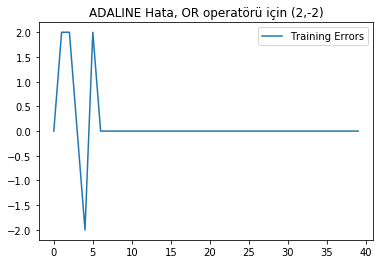

In [8]:
for input_item, beklenti in zip(X, B):
    # Feed this input forward and calculate the ADALINE output
    OUTPUT = (input_item[0]*WEIGHTS[0]) + (input_item[1]*WEIGHTS[1]) + (input_item[2]*WEIGHTS[2])

    # Run ADALINE_OUTPUT through the step function
    ADALINE_OUTPUT = basamak_fonksiyonu(OUTPUT)

    print ("Elde Edilen ", ADALINE_OUTPUT, "Gerçek(Beklenen) ", beklenti)


# Plot the errors to see how we did during training
plt.plot(errors, label='Training Errors')
plt.legend()
plt.title("ADALINE Hata, OR operatörü için (2,-2)")
plt.show()

### Yukarda görüleceği üzere belli bir süre sonra ADALİNE ağı OR problemini 0 hata ile çözebilecek yeteneğe kavuşmuştur.

In [9]:
# Bu sefer XOR problemi için veri seti oluşturalım ve ağı tekrar yukardaki gibi eğitelim.
X = np.array([[-1,-1, 1],
                   [-1, 1, 1],
                   [ 1,-1, 1],
                   [ 1, 1, 1]])

# output dataset - Eğer girdilerin ikisi de -1 veya 1 ise sonuç -1          
B = np.array([[-1, 1, 1, -1]]).T

In [10]:
# Adaline Ağını tekrar eğitelim

# Yeniden hata listemizi temizleyelim
errors = list()
OGRENME_KATSAYISI = 0.75

print("Eğitim öncesi ağırlıklar:\n", WEIGHTS)

# 10 devir/epok eğitim yapalım
for _ in range(10):
    
    for x, Beklenti in zip(X, B):
        
        # İleri yayılım ile çıktı hesaplama
        NET = x[0]*WEIGHTS[0] + x[1]*WEIGHTS[1] + x[2]*WEIGHTS[2]

        # Basamak(aktivasyon) fonksiyonu
        Cikti = basamak_fonksiyonu(NET)

        # Üretilen HATA değeri nedir?
        HATA = Beklenti - Cikti
        # Hatayı listeye ekleyelim.
        errors.append(HATA)
        
        # Update the weights based on the delta rule
        WEIGHTS[0] = WEIGHTS[0] + OGRENME_KATSAYISI * HATA * x[0]
        WEIGHTS[1] = WEIGHTS[1] + OGRENME_KATSAYISI * HATA * x[1]
        WEIGHTS[2] = WEIGHTS[2] + OGRENME_KATSAYISI * HATA * x[2]


print("Eğitim sonrası ağırlıklar:\n", WEIGHTS)

Eğitim öncesi ağırlıklar:
 [[0.88899321]
 [2.92819635]
 [2.38559006]]
Eğitim sonrası ağırlıklar:
 [[-0.61100679]
 [-1.57180365]
 [ 0.88559006]]


Elde Edilen  1 Gerçek(Beklenen)  [-1]
Elde Edilen  -1 Gerçek(Beklenen)  [1]
Elde Edilen  1 Gerçek(Beklenen)  [1]
Elde Edilen  -1 Gerçek(Beklenen)  [-1]


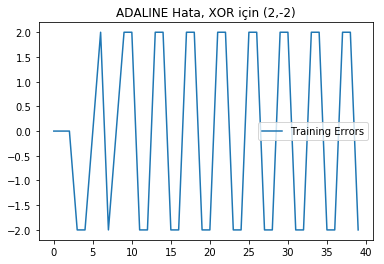

In [11]:
for input_item, beklenti in zip(X, B):
    # Feed this input forward and calculate the ADALINE output
    OUTPUT = (input_item[0]*WEIGHTS[0]) + (input_item[1]*WEIGHTS[1]) + (input_item[2]*WEIGHTS[2])

    # Run ADALINE_OUTPUT through the step function
    ADALINE_OUTPUT = basamak_fonksiyonu(OUTPUT)

    print ("Elde Edilen ", ADALINE_OUTPUT, "Gerçek(Beklenen) ", beklenti)


# Plot the errors to see how we did during training
plt.plot(errors, label='Training Errors')
plt.legend()
plt.title("ADALINE Hata, XOR için (2,-2)")
plt.show()

### Yukarıda da görüleceği üzere ADALİNE ağı XOR problemini hatasız çözememektedir. Başka bir değişle XOR problemi için bir model öğrenimi gerçekleştirememektedir. (Öğrenme katsayısını veya epok sayısını değiştirseniz de sonuç değişmemektedir.)